# GSE116256
## Xiaonan Wang
## 14July2022

The human AML data was downloaded from [GEO:GSE116256](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE116256) from [Galen et al., Cell 2019](https://pubmed.ncbi.nlm.nih.gov/30827681/).

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns
import smqpp

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
print(smqpp.__version__)

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.20.3 scipy==1.7.3 pandas==1.3.5 scikit-learn==1.0.1 statsmodels==0.13.1 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5
0.1.2


# Data in and pre-processing

In [2]:
import os 
import re
files = os.listdir('../data')

In [3]:
FN = [re.match('.*_(.*)\..*\..*',x)[1] for x in files]

In [4]:
FNtable = pd.Series(FN).value_counts()

In [5]:
FNnew = FNtable.index[FNtable.values==2]

In [185]:
print(FNnew)

Index(['BM2', 'BM5-34p', 'BM1', 'AML997-D0', 'AML1012-D0', 'AML921A-D0',
       'OCI-AML3', 'AML556-D0', 'AML329-D20', 'AML328-D29', 'AML329-D0',
       'AML314-D31', 'AML210A-D0', 'AML371-D0', 'BM5-34p38n', 'AML420B-D14',
       'AML870-D14', 'AML475-D0', 'AML707B-D0', 'AML722B-D0', 'AML707B-D113',
       'AML870-D0', 'AML420B-D0', 'AML329-D37', 'AML371-D34', 'AML707B-D18',
       'AML916-D0', 'AML997-D35', 'AML328-D0', 'AML420B-D35', 'MUTZ3',
       'AML556-D31', 'AML556-D15', 'AML314-D0', 'AML328-D171', 'AML419A-D0',
       'AML707B-D97', 'AML328-D113', 'BM4', 'AML722B-D49', 'BM3', 'AML475-D29',
       'AML707B-D41'],
      dtype='object')


In [6]:
t1 = pd.read_csv('../data/GSM3587997_BM2.anno.txt', sep='\t', index_col=0)

In [22]:
t1.head()

,NumberOfReads,AlignedToGenome,AlignedToTranscriptome,TranscriptomeUMIs,NumberOfGenes,CyclingScore,CyclingBinary,MutTranscripts,WtTranscripts,PredictionRF2,...,Score_cDC,Score_pDC,Score_earlyEry,Score_lateEry,Score_ProB,Score_B,Score_Plasma,Score_T,Score_CTL,Score_NK
Cell,,,,,,,,,,,,,,,,,,,,,
BM2_AAAATGTAGTAN,175512,139582,106301,3490,1107,2.495,yes,NaN,NaN,normal,...,0.011,0.054,0.041,0.019,0.634,0.067,0.021,0.030,0.019,0.013
BM2_AAACCCATGGCG,229861,194033,148681,5739,1673,1.282,yes,NaN,NaN,normal,...,0.078,0.021,0.033,0.010,0.030,0.015,0.010,0.009,0.014,0.016
BM2_AAAGTAACAGGC,100226,84727,63874,1900,653,-0.407,no,NaN,NaN,normal,...,0.202,0.043,0.021,0.010,0.021,0.069,0.017,0.037,0.044,0.018
BM2_AACCTTTGTGAG,98007,84346,47723,1979,757,-0.452,no,NaN,NaN,normal,...,0.188,0.018,0.007,0.002,0.004,0.009,0.001,0.013,0.025,0.014
BM2_AACGATTGGAGG,158191,127309,55244,2178,622,-0.119,no,NaN,NaN,normal,...,0.020,0.097,0.033,0.013,0.042,0.090,0.370,0.068,0.057,0.026


In [7]:
t2 = pd.read_csv('../data/GSM3587997_BM2.dem.txt', sep='\t', index_col=0)

In [20]:
t2.head()

,BM2_AAAATGTAGTAN,BM2_AAACCCATGGCG,BM2_AAAGTAACAGGC,BM2_AACCTTTGTGAG,BM2_AACGATTGGAGG,BM2_AACGTACGTTGN,BM2_AATAAACTGAAN,BM2_AATAAGTGAGTA,BM2_AATACCTGTTGA,BM2_AATAGTGATTGG,...,BM2_GATTGTCGCCAN,BM2_ATTGTGCTTTCA,BM2_CGTTTTGGGAGC,BM2_GAGAGCGAGGAG,BM2_ATGGTTAACGCN,BM2_CGGAGGCTGGAN,BM2_TCTAGGGACGCA,BM2_CTACGTTTCGCT,BM2_AGCTACGATTTG,BM2_GTAGTCAGTCGA
Gene,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,3
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
adata_all = []
for fn in FNnew:
    print(fn)
    cntFN = [x for x in files if fn+'.dem' in x]
    annoFN = [x for x in files if fn+'.anno' in x]
    cnt = pd.read_csv('../data/'+cntFN[0], sep='\t', index_col=0).T
    anno = pd.read_csv('../data/'+annoFN[0], sep='\t', index_col=0)
    print(cnt.shape)
    print(anno.shape)
    adata_sub = anndata.AnnData(X=cnt, obs=anno)
    if 'D' in fn:
        adata_sub.obs['Day'] = re.search('D\d+', fn)[0]
    else:
        adata_sub.obs['Day'] = 'NA'
    if 'BM' in fn:
        adata_sub.obs['Type'] = "BM"
    else:
        adata_sub.obs['Type'] = "AML"
    if '-' in fn:
        adata_sub.obs['SN'] = re.search('(.*)-.*', fn)[1]
    else:
        adata_sub.obs['SN'] = fn
    print(adata_sub.shape)
    adata_all.append(adata_sub)
    del adata_sub

BM2
(188, 27899)
(188, 27)
(188, 27899)
BM5-34p
(1431, 27899)
(1431, 27)
(1431, 27899)
BM1
(108, 27899)
(108, 27)
(108, 27899)
AML997-D0
(83, 27899)
(83, 27)
(83, 27899)
AML1012-D0
(1136, 27899)
(1136, 27)
(1136, 27899)
AML921A-D0
(3813, 27899)
(3813, 27)
(3813, 27899)
OCI-AML3
(1178, 27899)
(1178, 27)
(1178, 27899)
AML556-D0
(2328, 27899)
(2328, 27)
(2328, 27899)
AML329-D20
(953, 27899)
(953, 27)
(953, 27899)
AML328-D29
(1880, 27899)
(1880, 28)
(1880, 27899)
AML329-D0
(525, 27899)
(525, 27)
(525, 27899)
AML314-D31
(346, 27899)
(346, 27)
(346, 27899)
AML210A-D0
(748, 27899)
(748, 27)
(748, 27899)
AML371-D0
(756, 27899)
(756, 27)
(756, 27899)
BM5-34p38n
(1590, 27899)
(1590, 27)
(1590, 27899)
AML420B-D14
(1282, 27899)
(1282, 27)
(1282, 27899)
AML870-D14
(96, 27899)
(96, 27)
(96, 27899)
AML475-D0
(423, 27899)
(423, 27)
(423, 27899)
AML707B-D0
(1586, 27899)
(1586, 28)
(1586, 27899)
AML722B-D0
(79, 27899)
(79, 27)
(79, 27899)
AML707B-D113
(708, 27899)
(708, 28)
(708, 27899)
AML870-D0
(345, 

In [9]:
p53GL = np.genfromtxt('/home/xw251/rds/rds-bg200-hphi-gottgens/users/xw251/Lab_Members/Niki/Patel_SMQ2/Analysis_17Feb2021/p53GL.txt', dtype='str')
print(len(p53GL))
p53GL = [x.upper() for x in p53GL]
AL = np.genfromtxt('/home/xw251/rds/rds-bg200-hphi-gottgens/users/xw251/Lab_Members/Niki/Meng_GL/Aging/Aging_Sig_Reanalysis.txt', dtype=str)
print(len(AL))
AL = [x.upper() for x in AL]

16
221


In [10]:
for D in adata_all:
    sc.pp.normalize_per_cell(D, counts_per_cell_after=1e4)
    sc.pp.log1p(D)
    D.raw = D
    sc.pp.scale(D)
    p53OL = np.intersect1d(p53GL, D.var_names)
    AgeOL = np.intersect1d(AL, D.var_names)
    sc.tl.score_genes(D, p53OL, score_name = 'p53_Score', use_raw=False)
    sc.tl.score_genes(D, AgeOL, score_name = 'Ageing_Score', use_raw=False)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing score 'p53_Score'
    finished: added
    'p53_Score', score of gene set (adata.obs).
    348 total control genes are used. (0:00:00)
computing score 'Ageing_Score'
    finished: added
    'Ageing_Score', score of gene set (adata.obs).
    645 total control genes are used. (0:00:00)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing score 'p53_Score'
    finished: added
    'p53_Score', score of gene set (adata.obs).
    450 total control genes are used. (0:00:00)
computing score 'Ageing_Score'
    finished: added
    'Ageing_Score', score of gene set (adata.obs).
    797 total control genes are used. (0:00:00)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', co

computing score 'p53_Score'
    finished: added
    'p53_Score', score of gene set (adata.obs).
    599 total control genes are used. (0:00:00)
computing score 'Ageing_Score'
    finished: added
    'Ageing_Score', score of gene set (adata.obs).
    845 total control genes are used. (0:00:00)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing score 'p53_Score'
    finished: added
    'p53_Score', score of gene set (adata.obs).
    250 total control genes are used. (0:00:00)
computing score 'Ageing_Score'
    finished: added
    'Ageing_Score', score of gene set (adata.obs).
    445 total control genes are used. (0:00:00)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing score 'p53_Score'
    finished: added
    'p53_Score', score of gene set (adata.obs).
    649 to

    finished: added
    'Ageing_Score', score of gene set (adata.obs).
    500 total control genes are used. (0:00:00)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing score 'p53_Score'
    finished: added
    'p53_Score', score of gene set (adata.obs).
    500 total control genes are used. (0:00:00)
computing score 'Ageing_Score'
    finished: added
    'Ageing_Score', score of gene set (adata.obs).
    853 total control genes are used. (0:00:00)
normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)
computing score 'p53_Score'
    finished: added
    'p53_Score', score of gene set (adata.obs).
    500 total control genes are used. (0:00:00)
computing score 'Ageing_Score'
    finished: added
    'Ageing_Score', score of gene set (adata.obs).
    893 total control genes are use

In [11]:
adata = anndata.AnnData.concatenate(*adata_all)

In [189]:
adata

AnnData object with n_obs × n_vars = 41090 × 27899
    obs: 'NumberOfReads', 'AlignedToGenome', 'AlignedToTranscriptome', 'TranscriptomeUMIs', 'NumberOfGenes', 'CyclingScore', 'CyclingBinary', 'MutTranscripts', 'WtTranscripts', 'PredictionRF2', 'PredictionRefined', 'CellType', 'Score_HSC', 'Score_Prog', 'Score_GMP', 'Score_ProMono', 'Score_Mono', 'Score_cDC', 'Score_pDC', 'Score_earlyEry', 'Score_lateEry', 'Score_ProB', 'Score_B', 'Score_Plasma', 'Score_T', 'Score_CTL', 'Score_NK', 'Day', 'Type', 'SN', 'n_counts', 'p53_Score', 'Ageing_Score', 'NanoporeTranscripts', 'batch'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-10', 'std-10', 'mean-11', 'std-11', 'mean-12', 'std-12', 'mean-13', 'std-13', 'mean-14', 'std-14', 'mean-15', 'std-15', 'mean-16', 'std-16', 'mean-17', 'std-17', 'mean-18', 'std-18', 'mean-19', 'std-19', 'mean-2', 'std-2', 'mean-20', 'std-20', 'mean-21', 'std-21', 'mean-22', 'std-22', 'mean-23', 'std-23', 'mean-24', 'std-24', 'mean-25', 'std-25', 'mean-26', 'std-26

In [12]:
adata.obs['Sample'] = adata.obs['SN'].astype(str) + '_' + adata.obs['Day'].astype(str)

In [191]:
adata.obs['Sample'].value_counts()

AML921A_D0      3813
BM4_NA          3738
BM5_NA          3021
AML556_D0       2328
AML328_D113     2029
AML328_D29      1880
AML707B_D18     1673
AML707B_D0      1586
MUTZ3_NA        1502
AML556_D31      1451
AML328_D171     1402
AML420B_D14     1282
AML556_D15      1203
AML419A_D0      1189
OCI_NA          1178
AML1012_D0      1136
AML328_D0       1094
AML329_D20       953
AML916_D0        933
AML371_D0        756
AML210A_D0       748
AML420B_D35      743
AML707B_D113     708
BM3_NA           643
AML329_D0        525
AML420B_D0       485
AML475_D0        423
AML707B_D41      387
AML314_D31       346
AML870_D0        345
AML329_D37       224
AML371_D34       204
BM2_NA           188
AML997_D35       187
AML314_D0        162
BM1_NA           108
AML475_D29       102
AML870_D14        96
AML707B_D97       84
AML997_D0         83
AML722B_D0        79
AML722B_D49       73
Name: Sample, dtype: int64

In [13]:
adata.write('adata.h5ad')

/home/xw251/miniconda3/envs/scanpy182/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'CyclingBinary' as categorical
/home/xw251/miniconda3/envs/scanpy182/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'MutTranscripts' as categorical
/home/xw251/miniconda3/envs/scanpy182/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated 

# Analysis and plotting

In [3]:
adata = sc.read('adata.h5ad')

In [4]:
%reload_ext rpy2.ipython

In [92]:
print(adata.obs_keys())

['NumberOfReads', 'AlignedToGenome', 'AlignedToTranscriptome', 'TranscriptomeUMIs', 'NumberOfGenes', 'CyclingScore', 'CyclingBinary', 'MutTranscripts', 'WtTranscripts', 'PredictionRF2', 'PredictionRefined', 'CellType', 'Score_HSC', 'Score_Prog', 'Score_GMP', 'Score_ProMono', 'Score_Mono', 'Score_cDC', 'Score_pDC', 'Score_earlyEry', 'Score_lateEry', 'Score_ProB', 'Score_B', 'Score_Plasma', 'Score_T', 'Score_CTL', 'Score_NK', 'Day', 'Type', 'SN', 'n_counts', 'p53_Score', 'Ageing_Score', 'NanoporeTranscripts', 'batch', 'Sample']


In [5]:
inData = adata.obs[['Day', 'Type', 'SN', 'Sample', 'CellType', 'p53_Score', 'Ageing_Score', 'PredictionRefined', 'MutTranscripts', 'WtTranscripts']]

In [6]:
%%R 
library(ggplot2)
library(dplyr)
library(ggpubr)
library(rstatix)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: 
Attaching package: ‘rstatix’


R[write to console]: The following object is masked from ‘package:stats’:

    filter




In [7]:
%%R -i inData
print(head(inData))

                   Day Type  SN Sample CellType   p53_Score Ageing_Score
BM2_AAAATGTAGTAN-0  NA   BM BM2 BM2_NA     ProB  0.25384734   0.04163446
BM2_AAACCCATGGCG-0  NA   BM BM2 BM2_NA  ProMono -0.24239500  -0.00701982
BM2_AAAGTAACAGGC-0  NA   BM BM2 BM2_NA     Mono -0.08728376   0.07675187
BM2_AACCTTTGTGAG-0  NA   BM BM2 BM2_NA     Mono -0.11516181   0.10493232
BM2_AACGATTGGAGG-0  NA   BM BM2 BM2_NA   Plasma -0.16257085   0.05437155
BM2_AACGTACGTTGN-0  NA   BM BM2 BM2_NA  lateEry  0.43060660  -0.02596536
                   PredictionRefined MutTranscripts WtTranscripts
BM2_AAAATGTAGTAN-0            normal           <NA>          <NA>
BM2_AAACCCATGGCG-0            normal           <NA>          <NA>
BM2_AAAGTAACAGGC-0            normal           <NA>          <NA>
BM2_AACCTTTGTGAG-0            normal           <NA>          <NA>
BM2_AACGATTGGAGG-0            normal           <NA>          <NA>
BM2_AACGTACGTTGN-0            normal           <NA>          <NA>


In [8]:
%%R
inData$CellType1 = as.factor(inData$CellType)
print(levels(inData$CellType1))

 [1] "B"            "CTL"          "GMP"          "GMP-like"     "HSC"         
 [6] "HSC-like"     "Mono"         "Mono-like"    "NK"           "Plasma"      
[11] "ProB"         "ProMono"      "ProMono-like" "Prog"         "Prog-like"   
[16] "T"            "cDC"          "cDC-like"     "earlyEry"     "lateEry"     
[21] "pDC"         


In [9]:
%%R
levels(inData$CellType1) = c(
    "B",            "cDC",          "cDC",     "CTL",          "earlyEry",    
    "GMP",          "GMP",     "HSC",          "HSC",     "lateEry",     
    "Mono",         "Mono",    "NK",           "pDC",          "Plasma",      
    "ProB",         "Prog",         "Prog",    "ProMono",      "ProMono",
    "T" )

In [10]:
%%R
inData$CellType1 = factor(inData$CellType1, levels=levels(inData$CellType1)[c(6,13,5,14,8,2,10,4,7,12,1,11,15,3,9)])

In [11]:
%%R
print(dim(inData))
inData = inData[!is.na(inData$CellType1),]
print(dim(inData))

[1] 41090    11
[1] 40307    11


In [12]:
%%R
inData = inData[inData$Sample!="OCI_NA",]
inData = inData[inData$Sample!="MUTZ3_NA",]

In [160]:
%%R
write.table(inData, "inData.txt", quote=F, row.names=T, col.names=T, sep="\t")

In [2]:
%reload_ext rpy2.ipython

In [5]:
%%R 
library(ggplot2)
library(dplyr)
library(ggpubr)
library(rstatix)

In [7]:
%%R
inData = read.table("../GSE116256/Analysis/inData.txt", header=T, sep="\t")
inData$PredictionRefined = factor(inData$PredictionRefined, levels=c("normal", "malignant", "unclear"))
print(head(inData))

                    Day Type  SN Sample CellType   p53_Score Ageing_Score
BM2_AAAATGTAGTAN-0 <NA>   BM BM2 BM2_NA     ProB  0.25384734   0.04163446
BM2_AAACCCATGGCG-0 <NA>   BM BM2 BM2_NA  ProMono -0.24239500  -0.00701982
BM2_AAAGTAACAGGC-0 <NA>   BM BM2 BM2_NA     Mono -0.08728376   0.07675187
BM2_AACCTTTGTGAG-0 <NA>   BM BM2 BM2_NA     Mono -0.11516181   0.10493232
BM2_AACGATTGGAGG-0 <NA>   BM BM2 BM2_NA   Plasma -0.16257085   0.05437155
BM2_AACGTACGTTGN-0 <NA>   BM BM2 BM2_NA  lateEry  0.43060660  -0.02596536
                   PredictionRefined MutTranscripts WtTranscripts CellType1
BM2_AAAATGTAGTAN-0            normal           <NA>          <NA>      ProB
BM2_AAACCCATGGCG-0            normal           <NA>          <NA>   ProMono
BM2_AAAGTAACAGGC-0            normal           <NA>          <NA>      Mono
BM2_AACCTTTGTGAG-0            normal           <NA>          <NA>      Mono
BM2_AACGATTGGAGG-0            normal           <NA>          <NA>    Plasma
BM2_AACGTACGTTGN-0        

In [11]:
%%R
print(table(inData$Day))
print(table(inData$PredictionRefined))
Data = inData %>% filter(Day == "D0" & PredictionRefined != "unclear")
print(dim(Data))
print(table(Data$Type))
tab1 = table(Data$Sample, Data$PredictionRefined)
Data = Data %>% filter(!Sample %in% rownames(tab1)[tab1[,'malignant']<3])
print(table(Data$Sample))
Data = Data %>% filter(Sample %in% c("AML556_D0", "AML210A_D0", "AML921A_D0", "AML916_D0", "AML707B_D0", "AML870_D0"))
Data$Sample = factor(Data$Sample, levels=c("AML556_D0", "AML210A_D0", "AML921A_D0", "AML916_D0", "AML707B_D0", "AML870_D0"))


   D0  D113   D14   D15  D171   D18   D20   D29   D31   D34   D35   D37   D41 
15685  2737  1378  1203  1402  1673   953  1982  1797   204   930   224   387 
  D49   D97 
   73    84 

   normal malignant   unclear 
    23005     13489      1133 
[1] 14778    11

  AML 
14778 

AML1012_D0 AML210A_D0  AML328_D0  AML329_D0 AML419A_D0 AML420B_D0  AML475_D0 
      1136        748       1094        525       1189        485        423 
 AML556_D0 AML707B_D0  AML870_D0  AML916_D0 AML921A_D0 
      2328       1586        345        933       3813 


      Sample       .y. group1    group2  n1   n2  statistic        df        p
1  AML556_D0 p53_Score normal malignant 266 2062 -5.0659724 313.65464 6.95e-07
2 AML210A_D0 p53_Score normal malignant 284  464 -4.3173523 600.15329 1.85e-05
3 AML921A_D0 p53_Score normal malignant 435 3378 -2.9830079 530.82201 2.99e-03
4  AML916_D0 p53_Score normal malignant 158  775 -2.0196007 267.36229 4.44e-02
5 AML707B_D0 p53_Score normal malignant 216 1370  1.9288895 246.48110 5.49e-02
6  AML870_D0 p53_Score normal malignant  31  314 -0.6522872  38.29485 5.18e-01
     p.adj y.position            groups xmin xmax
1 6.95e-07     2.4514 normal, malignant    1    2
2 1.85e-05     2.1474 normal, malignant    1    2
3 2.99e-03     3.2034 normal, malignant    1    2
4 4.44e-02     1.7584 normal, malignant    1    2
5 5.49e-02     2.7434 normal, malignant    1    2
6 5.18e-01     1.4634 normal, malignant    1    2


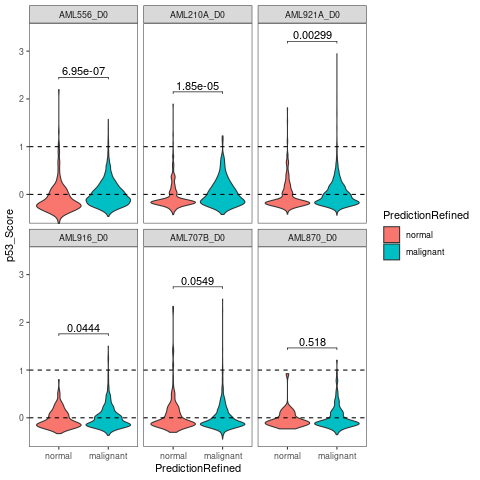

In [15]:
%%R
stat.test = Data %>% 
    group_by(Sample) %>%
    t_test(p53_Score ~ PredictionRefined) %>%
    adjust_pvalue(method = "none") %>% 
    add_xy_position(x = "PredictionRefined", dodge = 0.8)
print(head(as.data.frame(stat.test)))

p = ggplot(Data, aes(x=PredictionRefined, y=p53_Score)) +
    geom_violin(aes(fill=PredictionRefined),scale="width") +
    stat_pvalue_manual(
        stat.test, label = "p.adj", tip.length = 0.01
    ) +
    scale_y_continuous(expand = expansion(mult = c(0, 0.1))) +
    facet_wrap(~Sample, ncol=3,scales='fixed') +
    geom_hline(yintercept=c(0,1), linetype='dashed') + 
    theme_bw() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())
p
ggsave('Fig4f.pdf', width=8, height=8, useDingbats=FALSE)
p